Scikit-learn Tutorial: https://www.datacamp.com/community/tutorials/machine-learning-python

In [6]:
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()

# Print the `digits` data 
print(digits.keys())
print(digits.DESCR)
print(digits.data.shape)

['images', 'data', 'target_names', 'DESCR', 'target']
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This ge

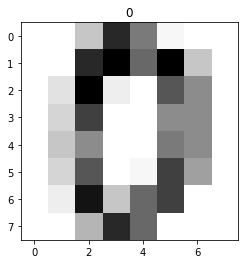

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(digits.images[0],cmap="Greys",interpolation=None)
plt.title(digits.target[0]);

Principal Component Analysis (PCA) - Find eigenvalues and eigenvectors of multidimensional covariance matrix, use only eigenvectors directions with largest eigenvalues (such that 99% of the variance can be explained by these quantities)

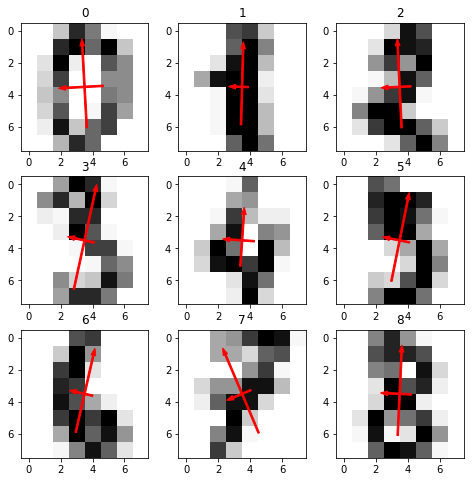

In [43]:
import numpy as np
from numpy.linalg import eig

def cov(a,b,w):

    a_mean = np.average(a,weights=w)
    b_mean = np.average(b,weights=w)

    covar  = np.sum(w*(a-a_mean)*(b-b_mean))/np.sum(w)

    return covar

X,Y    = np.meshgrid(np.arange(8),np.arange(8))

fig,ax = plt.subplots(3,3,figsize=(8,8))

ax = ax.ravel()

for i in range(9):

    sample = digits.images[i]

    cov_M = np.array([[cov(X,X,sample),cov(X,Y,sample)],[cov(Y,X,sample),cov(Y,Y,sample)]])

    eval,evec = eig(cov_M)

    #print(eval,evec)

    ax[i].imshow(sample,cmap="Greys",interpolation=None)

    for j in range(len(eval)):
        sint = evec[j][1]
        cost = evec[j][0]
        ax[i].arrow(3.5-0.5*eval[j]*cost,3.5-0.5*eval[j]*sint,eval[j]*cost,eval[j]*sint,color='r',width=0.1)

    ax[i].set_title(digits.target[i]);

Now PCA for images, write image as vector, use multiple images to form covariance matrix

http://people.ciirc.cvut.cz/~hlavac/TeachPresEn/11ImageProc/15PCA.pdf

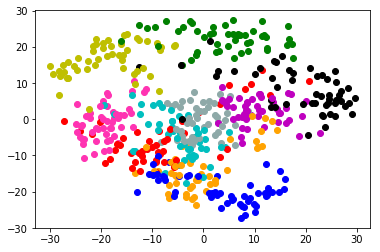

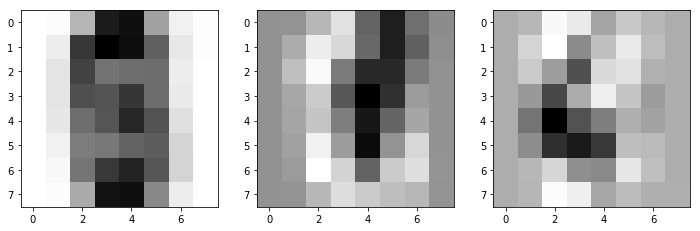

In [104]:
N_sample = 500

sample = digits.data[0:N_sample]

# Normalise the data

mean_image = np.sum(sample,axis=0)/N_sample

norm_sample = sample-mean_image

cov = np.zeros((mean_image.shape[0],mean_image.shape[0]))
for i in range(N_sample):
    cov += np.outer(norm_sample[i,:],norm_sample[i,:])
    
eval,evec = eig(cov)

evec = np.real(evec)

# Decompose an image using a small number of pricipal components
N_PC = 2

c_dict = {0 : '#FF33B2',1 : 'k',2 : 'r',3 : 'b',4 : 'g',5 : 'c',6 : 'y',7 : 'm',8 : '#8EA9A8',9 : '#FFA302'}

T = np.zeros((N_sample))
for i in range(N_sample):
    x,y = np.dot(sample[i,:],evec[:,0:N_PC])
    plt.plot(x,y,marker='o',c=c_dict[digits.target[i]])

# Plot the two highest eigenvalue eigenimages
fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(mean_image.reshape(8,8),cmap="Greys",interpolation=None)
ax[1].imshow(evec[:,0].reshape(8,8),cmap="Greys",interpolation=None)
ax[2].imshow(evec[:,1].reshape(8,8),cmap="Greys",interpolation=None);

Trying with 3 components...

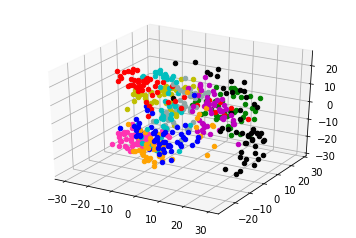

In [106]:
from mpl_toolkits.mplot3d import Axes3D
N_PC = 3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T = np.zeros((N_sample))
for i in range(N_sample):
    x,y,z = np.dot(sample[i,:],evec[:,0:N_PC])
    ax.scatter(x,y,z,marker='o',c=c_dict[digits.target[i]])